### **Importing required libraries**

In [ ]:
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

### **Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("drive/MyDrive/Research_Project_Team_Bro_Code/Dataset_prep & implementations/Udara's Implementations/Implementation/A4.xlsx")
#df=pd.read_excel("/content/Test_df.xlsx")
df.sample(frac=0.1).head()

,Unnamed: 0,mthd,cmt
83681,116454,private bytesref computepayloadfrommappingpayl...,compute payload from mapping payload.
216470,321912,@canignorereturnvalue public ordered containsa...,fails if the map does not contain at least the...
171578,250347,static protected completablefuture<clientrespo...,error generating shortcut method
107629,151947,private void outputfragments(ginjectorbindings...,"for each fragment in the given , writes the fi..."
5799,7513,"private string recoverqueue(string queuename, ...",recovers the along with its .


In [ ]:
df.shape

(242515, 3)

### **Exploring data**

Missing data

In [ ]:
mod_df = df.dropna().reset_index()
print(mod_df.isnull().sum())

index         0
Unnamed: 0    0
mthd          0
cmt           0
dtype: int64


**First word count**

In [ ]:
word_count={}
for i in range(df.shape[0]):
  line=df.iloc[i,1].split()[0]
  word_count[line]=word_count.get(line,0)+1

count=word_count.keys()
words=word_count.values()
df_word_count=pd.DataFrame(list(zip(count,words)),columns=["First Words","Count"])
df_word_count.head(10)

,First Words,Count
0,public,130305
1,@pure,313
2,void,2988
3,@sneakythrows,109
4,protected,16118
5,@override,15132
6,private,42852
7,@jrubymethod,20
8,<t>,41
9,static,4093


In [ ]:
##Sorted dataframe
df_sorted=df_word_count.sort_values("Count",ascending=False)
df_sorted.head(20).reset_index()

,index,First Words,Count
0,0,public,130305
1,6,private,42852
2,4,protected,16118
3,5,@override,15132
4,9,static,4093
5,2,void,2988
6,18,"@suppresswarnings(""unchecked"")",2198
7,2598,if,1633
8,32,final,1510
9,24,string,946


In [ ]:
lst_inline_codes=[]
lst_inline_comments=[]

lst_method_codes=[]
lst_method_comments=[]

for i in range(df.shape[0]):
  word=df.iloc[i,1].split()[0].strip().lower()
  if ((word=="private") or (word=="public") or (word=="protected") or (word=="static") or (word=="void") or (word=="@override")):
    lst_method_codes.append(df.iloc[i,1])
    lst_method_comments.append(df.iloc[i,2])
  else:
    lst_inline_codes.append(df.iloc[i,1])
    lst_inline_comments.append(df.iloc[i,2])


In [ ]:
df_inline=pd.DataFrame(list(zip(lst_inline_codes,lst_inline_comments)),columns=["Code","Comment"])
df_inline

,Code,Comment
0,@pure public static roadtype getpreferredroadt...,replies the preferred type of road segment.
1,@sneakythrows public static string getcasserve...,gets cas server host address.
2,@jrubymethod public static irubyobject initial...,syck_out_initialize
3,"<t> void registerspis(final url presource, fin...",registers all spis listed in the given resource.
4,"@suppresswarnings(""deprecation"") private void ...",refresh day btn tables
...,...,...
31022,writer.writeendcollection() .writeenddocument();,end collection
31023,double v0 = histogrammag[index0]; double v1 = ...,compute the peak location using a second order...
31024,bs[0] = (byte) (((_len*bpv)&7)==0 ? 0 : (8-((_...,save the gap = number of unfilled bits and bpv...
31025,mcamera = openconfigurecamera(mcamerainfo); se...,open and configure the camera


In [ ]:
df_methods=pd.DataFrame(list(zip(lst_method_codes,lst_method_comments)),columns=["Code","Comment"])
df_methods

,Code,Comment
0,public void load(string name) throws ioexcepti...,load from local variable or non-static field s...
1,"public static <t> t notnull(t obj, string name...",check that a value is not null. if null throws...
2,public void marshall(deletegithubaccounttokenr...,marshall the given parameter object.
3,public boolean removeb(int index) { boundschec...,operates exactly as }
4,public void stop() throws illegalstateexceptio...,stop playback
...,...,...
211483,@override public void setvalues(double[] param...,calculate model values for given parameters
211484,@override public r call(callable<r> callable) ...,an implementation which actually does not atte...
211485,public org.jivesoftware.smack.chat.chat create...,"do not re-use chat api, which was designed for..."
211486,@override public boolean shouldstop(int previo...,a stop strategy which never stops retrying


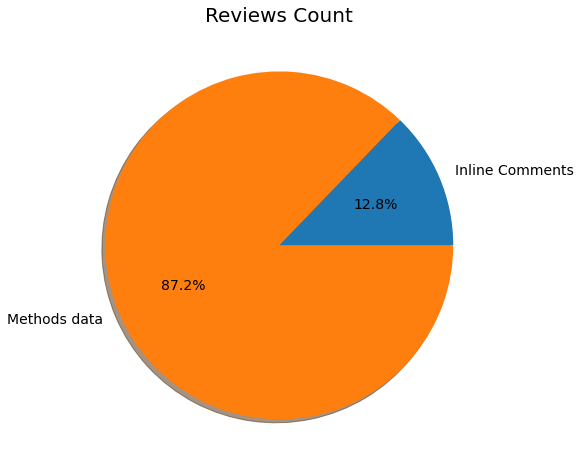

In [ ]:
# pie chart for both dataset
lst=[df_inline.shape[0],df_methods.shape[0]]
plt.figure(figsize=(8,8))
plt.title('Reviews Count',fontsize=20)
label=["Inline Comments","Methods data"]
plt.pie(lst,labels=label,shadow = True,autopct='%1.1f%%',textprops={'fontsize': 14})
#plt.legend(loc='best')
plt.show()

In [ ]:
def wc(d,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(d))
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')

In [ ]:
#Function Examine comment lengths - generate Boxplot and histogram 
def word_length_plots(data_str,title):
    review_len = pd.Series([len(str(review).split()) for review in data_str])
    plt.figure(figsize=(10,10))
    review_len.plot(kind='box')
    plt.title(title)
    plt.show()
    
    print(title)
    print(review_len.describe())
    
    plt.figure(figsize=(12,8))
    sns.histplot(review_len)
    plt.title(title)
    plt.show()

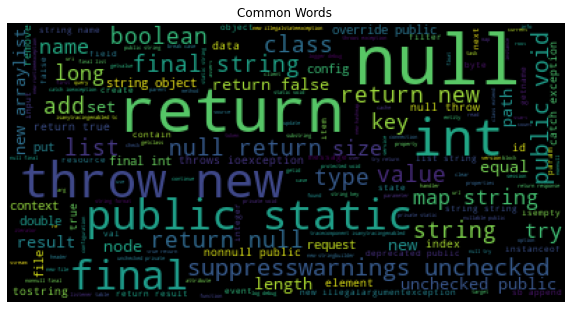

In [ ]:
data_codes=df_inline['Code'].astype('string')
wc(data_codes,'black','Common Words ')


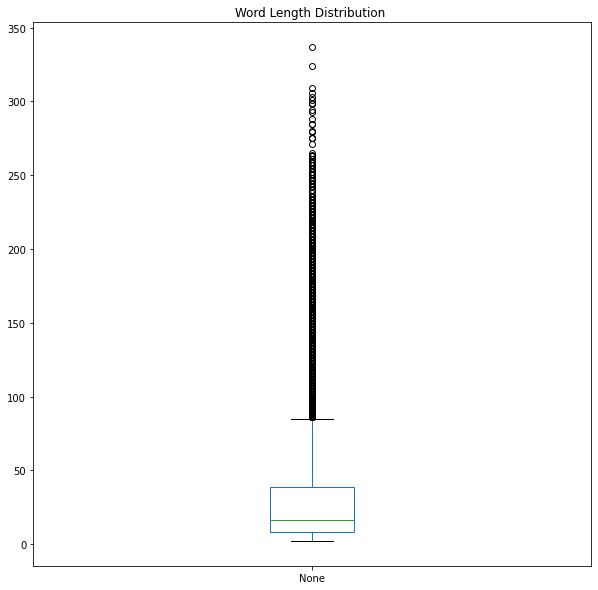

Word Length Distribution 
count    31027.000000
mean        31.572501
std         38.082771
min          2.000000
25%          8.000000
50%         16.000000
75%         39.000000
max        337.000000
dtype: float64


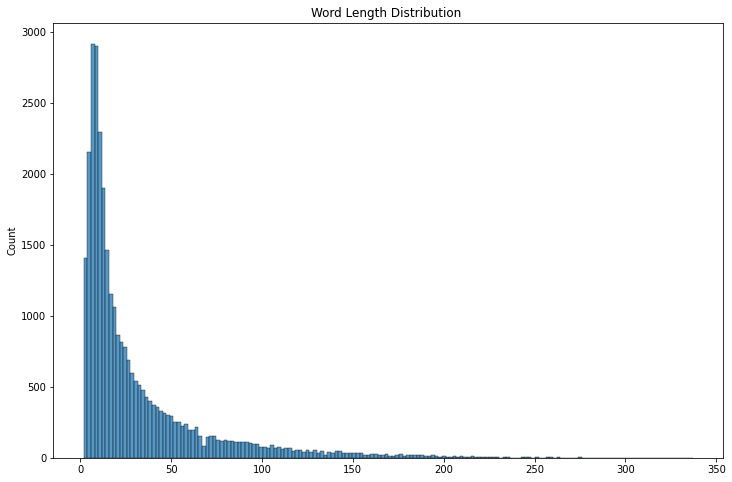

In [ ]:
word_length_plots(data_codes,'Word Length Distribution ')

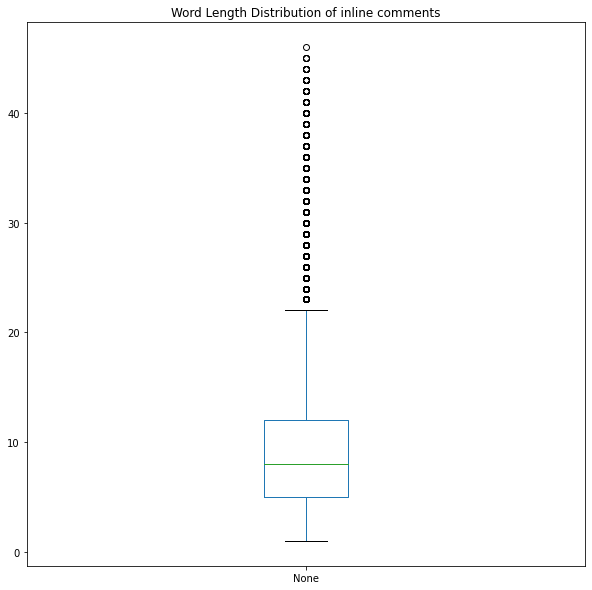

Word Length Distribution of inline comments
count    31027.000000
mean         9.454797
std          6.985489
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         46.000000
dtype: float64


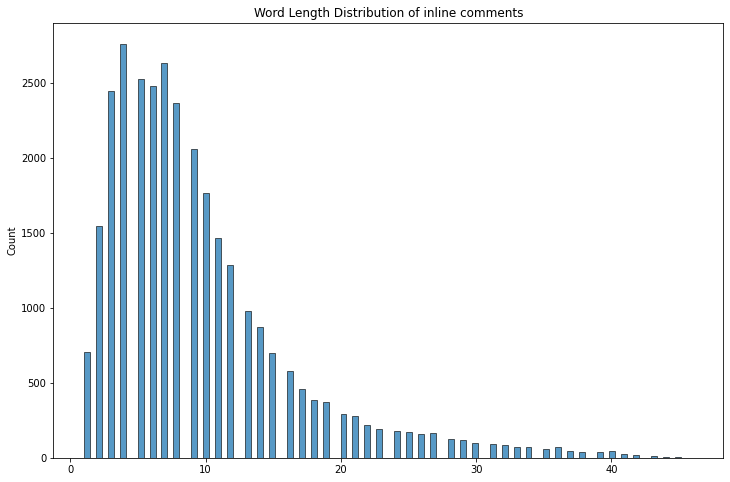

In [ ]:
data_comments=df_inline['Comment'].astype('string')
#wc(data_comments,'black','Common Words in inline comments')
word_length_plots(data_comments,'Word Length Distribution of inline comments')

**Limit the comment word size to 100**

In [ ]:
df_inline_100=df_inline.copy()

for i in range(df_inline_100.shape[0]):
  try:
    words=df_inline_100.iloc[i,1].split()
    if len(words)>100:
      words_100=words[0:100]
      df_inline_100.iloc[i,1]=' '.join(words_100)  
  except AttributeError:
      pass

In [ ]:
df_inline_100.iloc[i,1]

'if addaccessorannotations is overridden, this method will be updated to delegate to it'

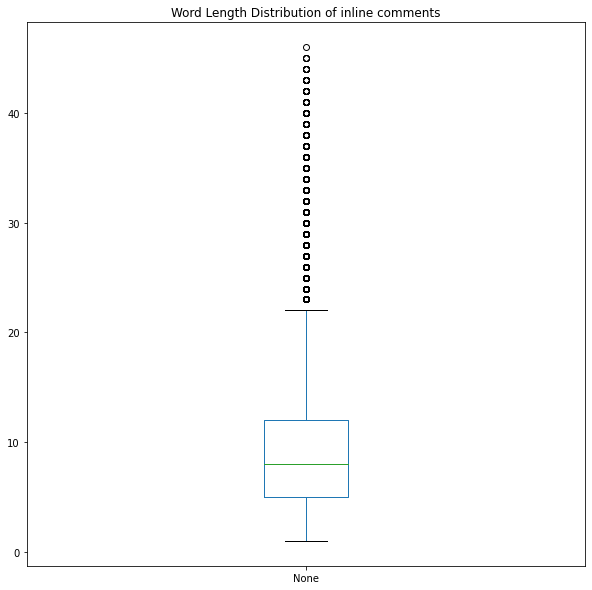

Word Length Distribution of inline comments
count    31027.000000
mean         9.454797
std          6.985489
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         46.000000
dtype: float64


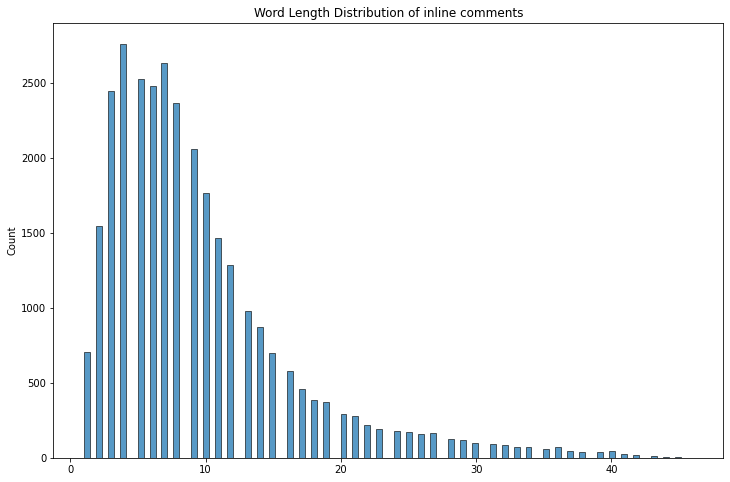

In [ ]:
data_comments_100=df_inline_100['Comment'].astype('string')
#wc(data_comments_100,'black','Common Words in inline comments')
word_length_plots(data_comments_100,'Word Length Distribution of inline comments')

In [ ]:
df_new = pd.read_excel("drive/MyDrive/Research_Project_Team_Bro_Code/Dataset_prep & implementations/Udara's Implementations/Implementation/Inline_comments.xlsx")
#df=pd.read_excel("/content/Test_df.xlsx")

In [ ]:
df_new.columns=df_inline_100.columns
df_inline_100_final=pd.concat([df_inline_100,df_new])

In [ ]:
df_inline_100.shape,df_inline_100_final.shape

((31027, 2), (31055, 2))